The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


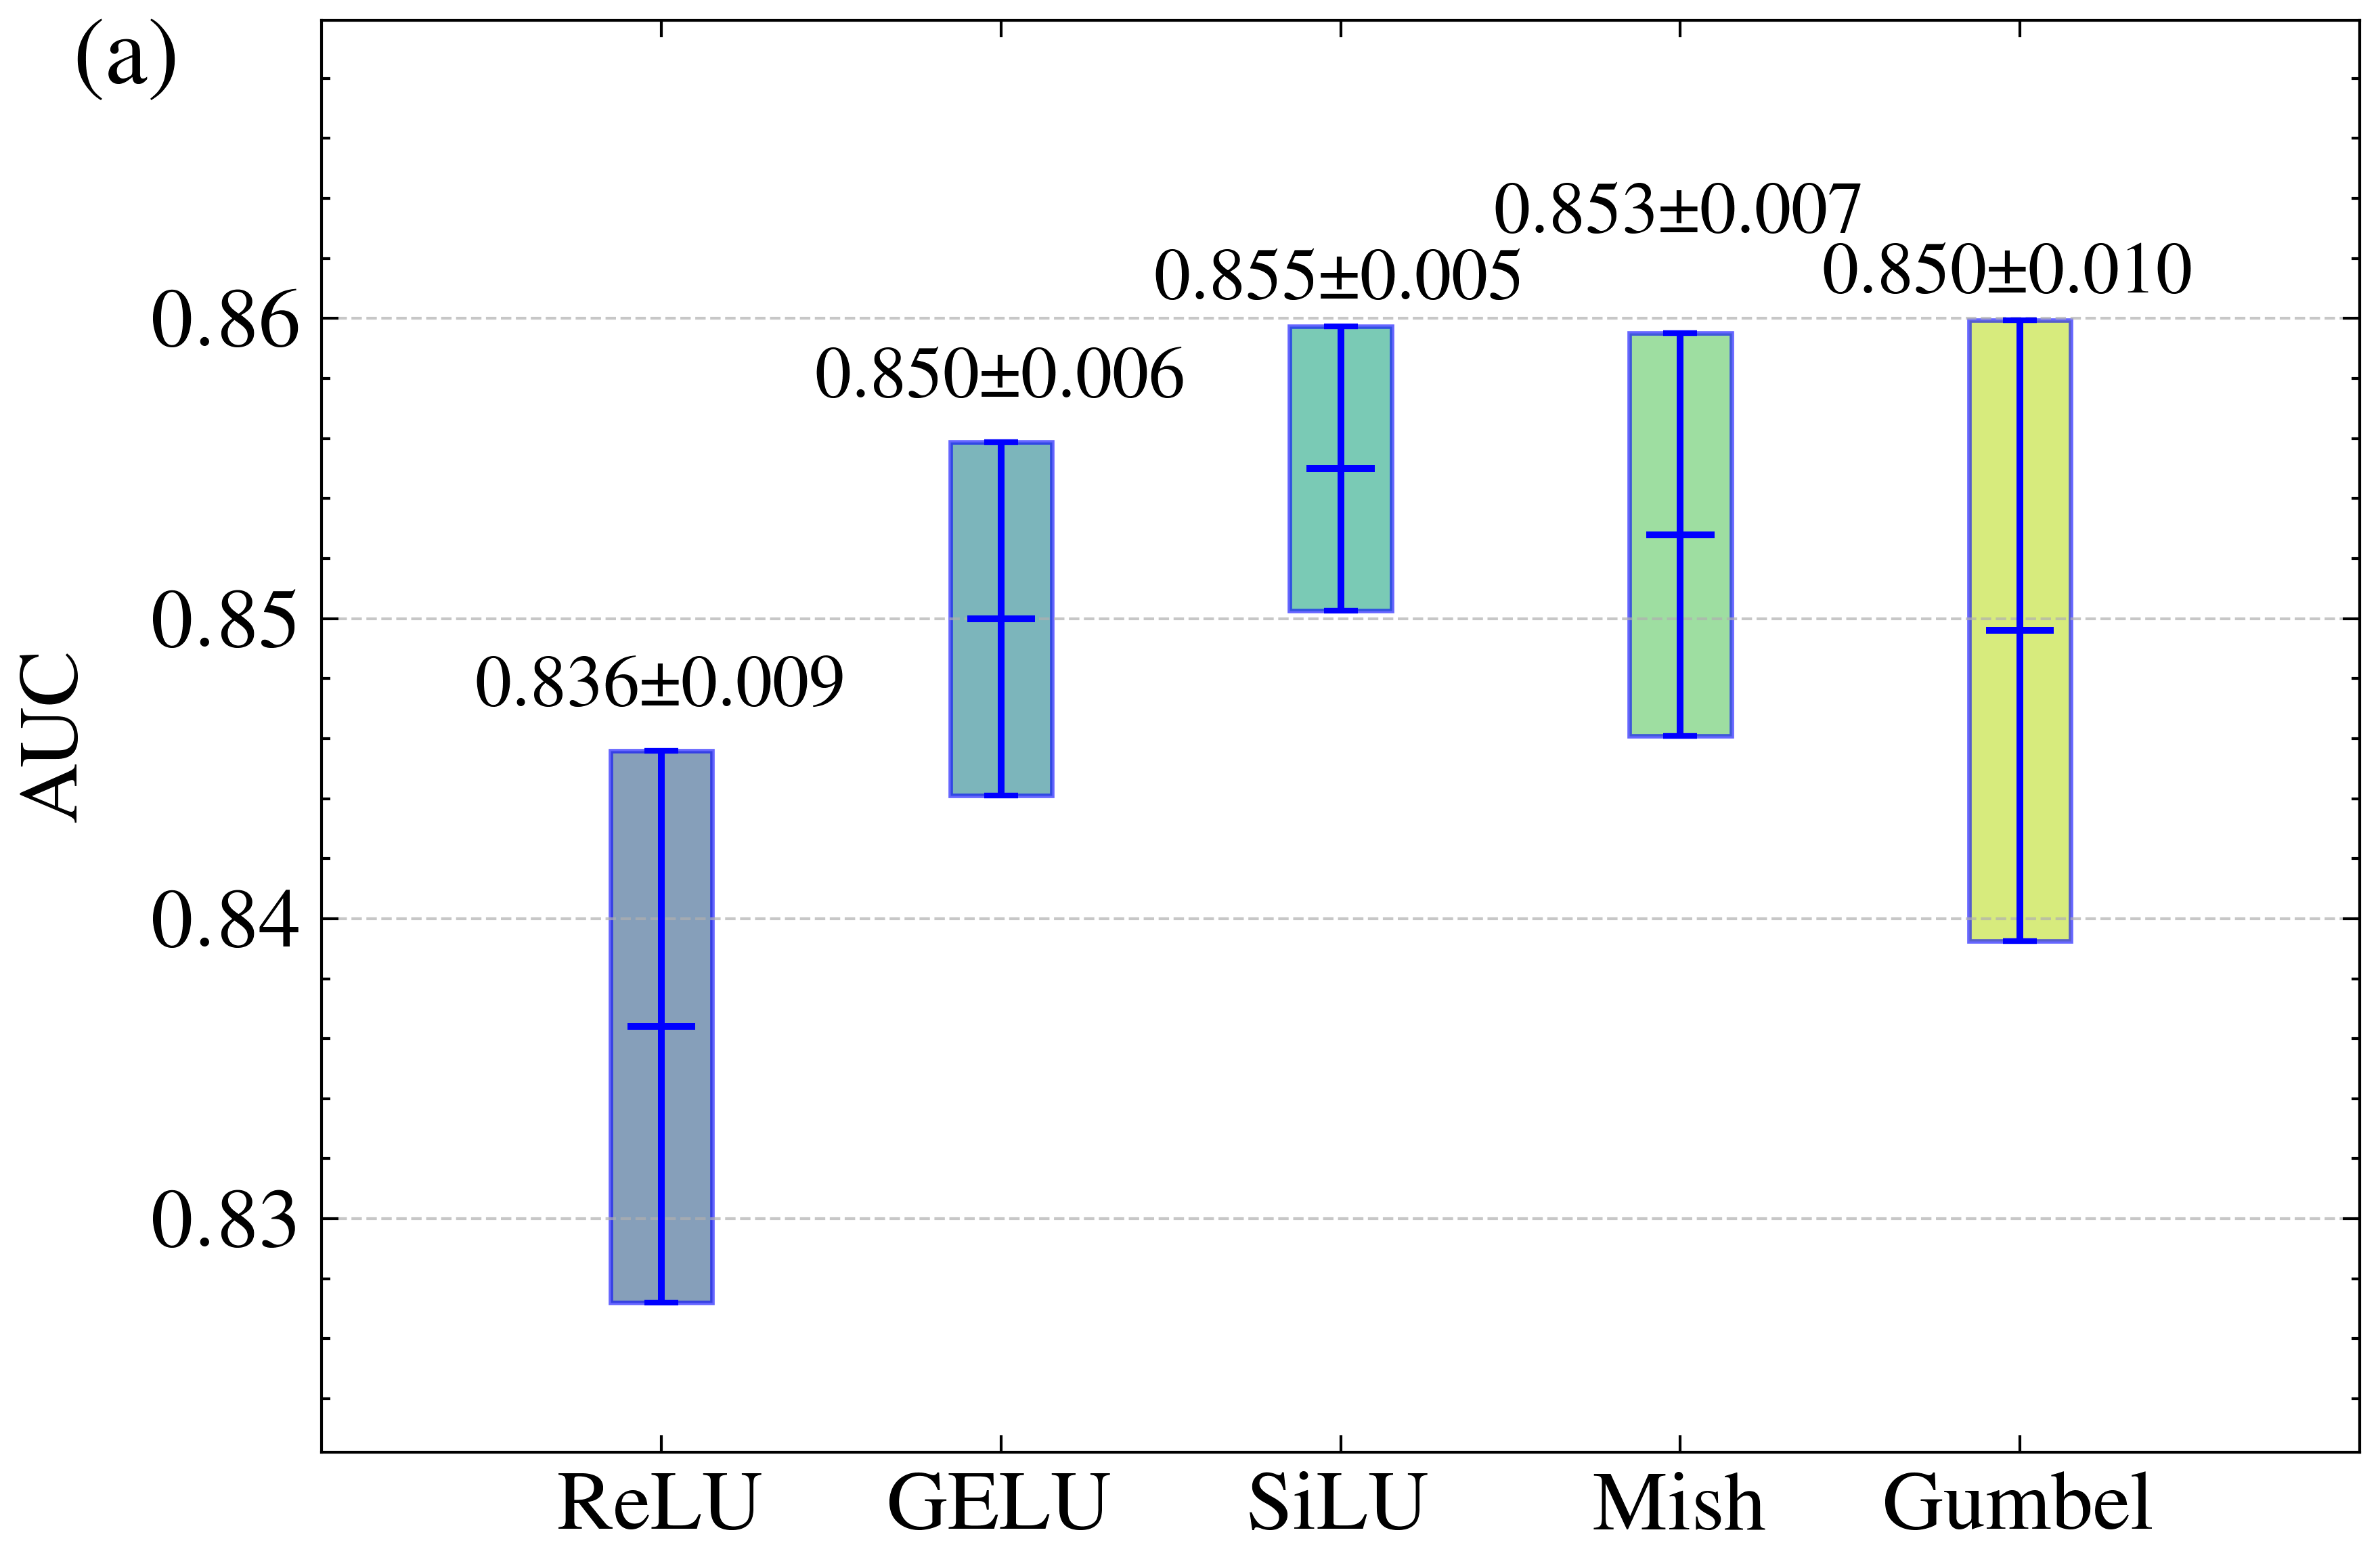

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数名称
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']

# 5 组数据（AUC 结果）
auc_data = np.array([
    [0.84, 0.826, 0.846, 0.836, 0.834],  # ReLU
    [0.853, 0.851, 0.842, 0.85, 0.854],  # GELU
    [0.861, 0.854, 0.856, 0.853, 0.851],  # SiLU
    [0.857, 0.855, 0.847, 0.858, 0.847],  # Mish
    [0.849, 0.843, 0.84, 0.858, 0.858]   # Gumbel
])

# 计算均值和标准差
auc_means = np.mean(auc_data, axis=1)
auc_stds = np.std(auc_data, axis=1, ddof=1)  # 样本标准差

# 样本数
n = auc_data.shape[1]

# 计算 95% 置信区间
t_value = t.ppf(0.975, n - 1)  # t 分布临界值
auc_cis = t_value * (auc_stds / np.sqrt(n))

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 矩形和误差条的宽度
width = 0.3  

# 创建灰度颜色列表（从浅到深）
# gray_levels = np.linspace(0.5, 0.9, len(activation_functions))  # 颜色更浅
# colors = [plt.cm.gray(level) for level in gray_levels]
#colors = [plt.cm.inferno(i) for i in np.linspace(0.2, 0.9, len(activation_functions))]
colors = [plt.cm.viridis(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  

# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算误差区间
    lower = auc_means[i] - auc_cis[i]
    upper = auc_means[i] + auc_cis[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, 
           color=colors[i], alpha=0.6, edgecolor='blue', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, 
              colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_cis[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5
    x_offset = 0
    if i == len(activation_functions) - 2: # Mish
        y_offset = 15
        x_offset = 0 # 调整 Mish 的水平偏移
    elif i == len(activation_functions) - 1: # Gumbel
        y_offset = 2 # 调整 Gumbel 的垂直偏移
        x_offset = -2 # 调整 Gumbel 的水平偏移
    if i == len(activation_functions) - 3: # Mish
        y_offset = 2
        x_offset = 0 # 调整 Mish 的水平偏移

    ax.annotate(f'{auc_means[i]:.3f}±{auc_cis[i]:.3f}',
        xy=(x[i], upper),
        xytext=(x_offset, y_offset),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=13)
# 设置轴标签
ax.set_ylabel(r'AUC', fontsize=15, labelpad=10)

# 设置 x 轴刻度
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min(auc_means - auc_cis) - 0.005
y_max = max(auc_means + auc_cis) + 0.01
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  

# 添加 (b) 标记
ax.text(-0.12, 1.0, '(a)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig3a.eps', format='eps', dpi=800)

# 显示图形
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


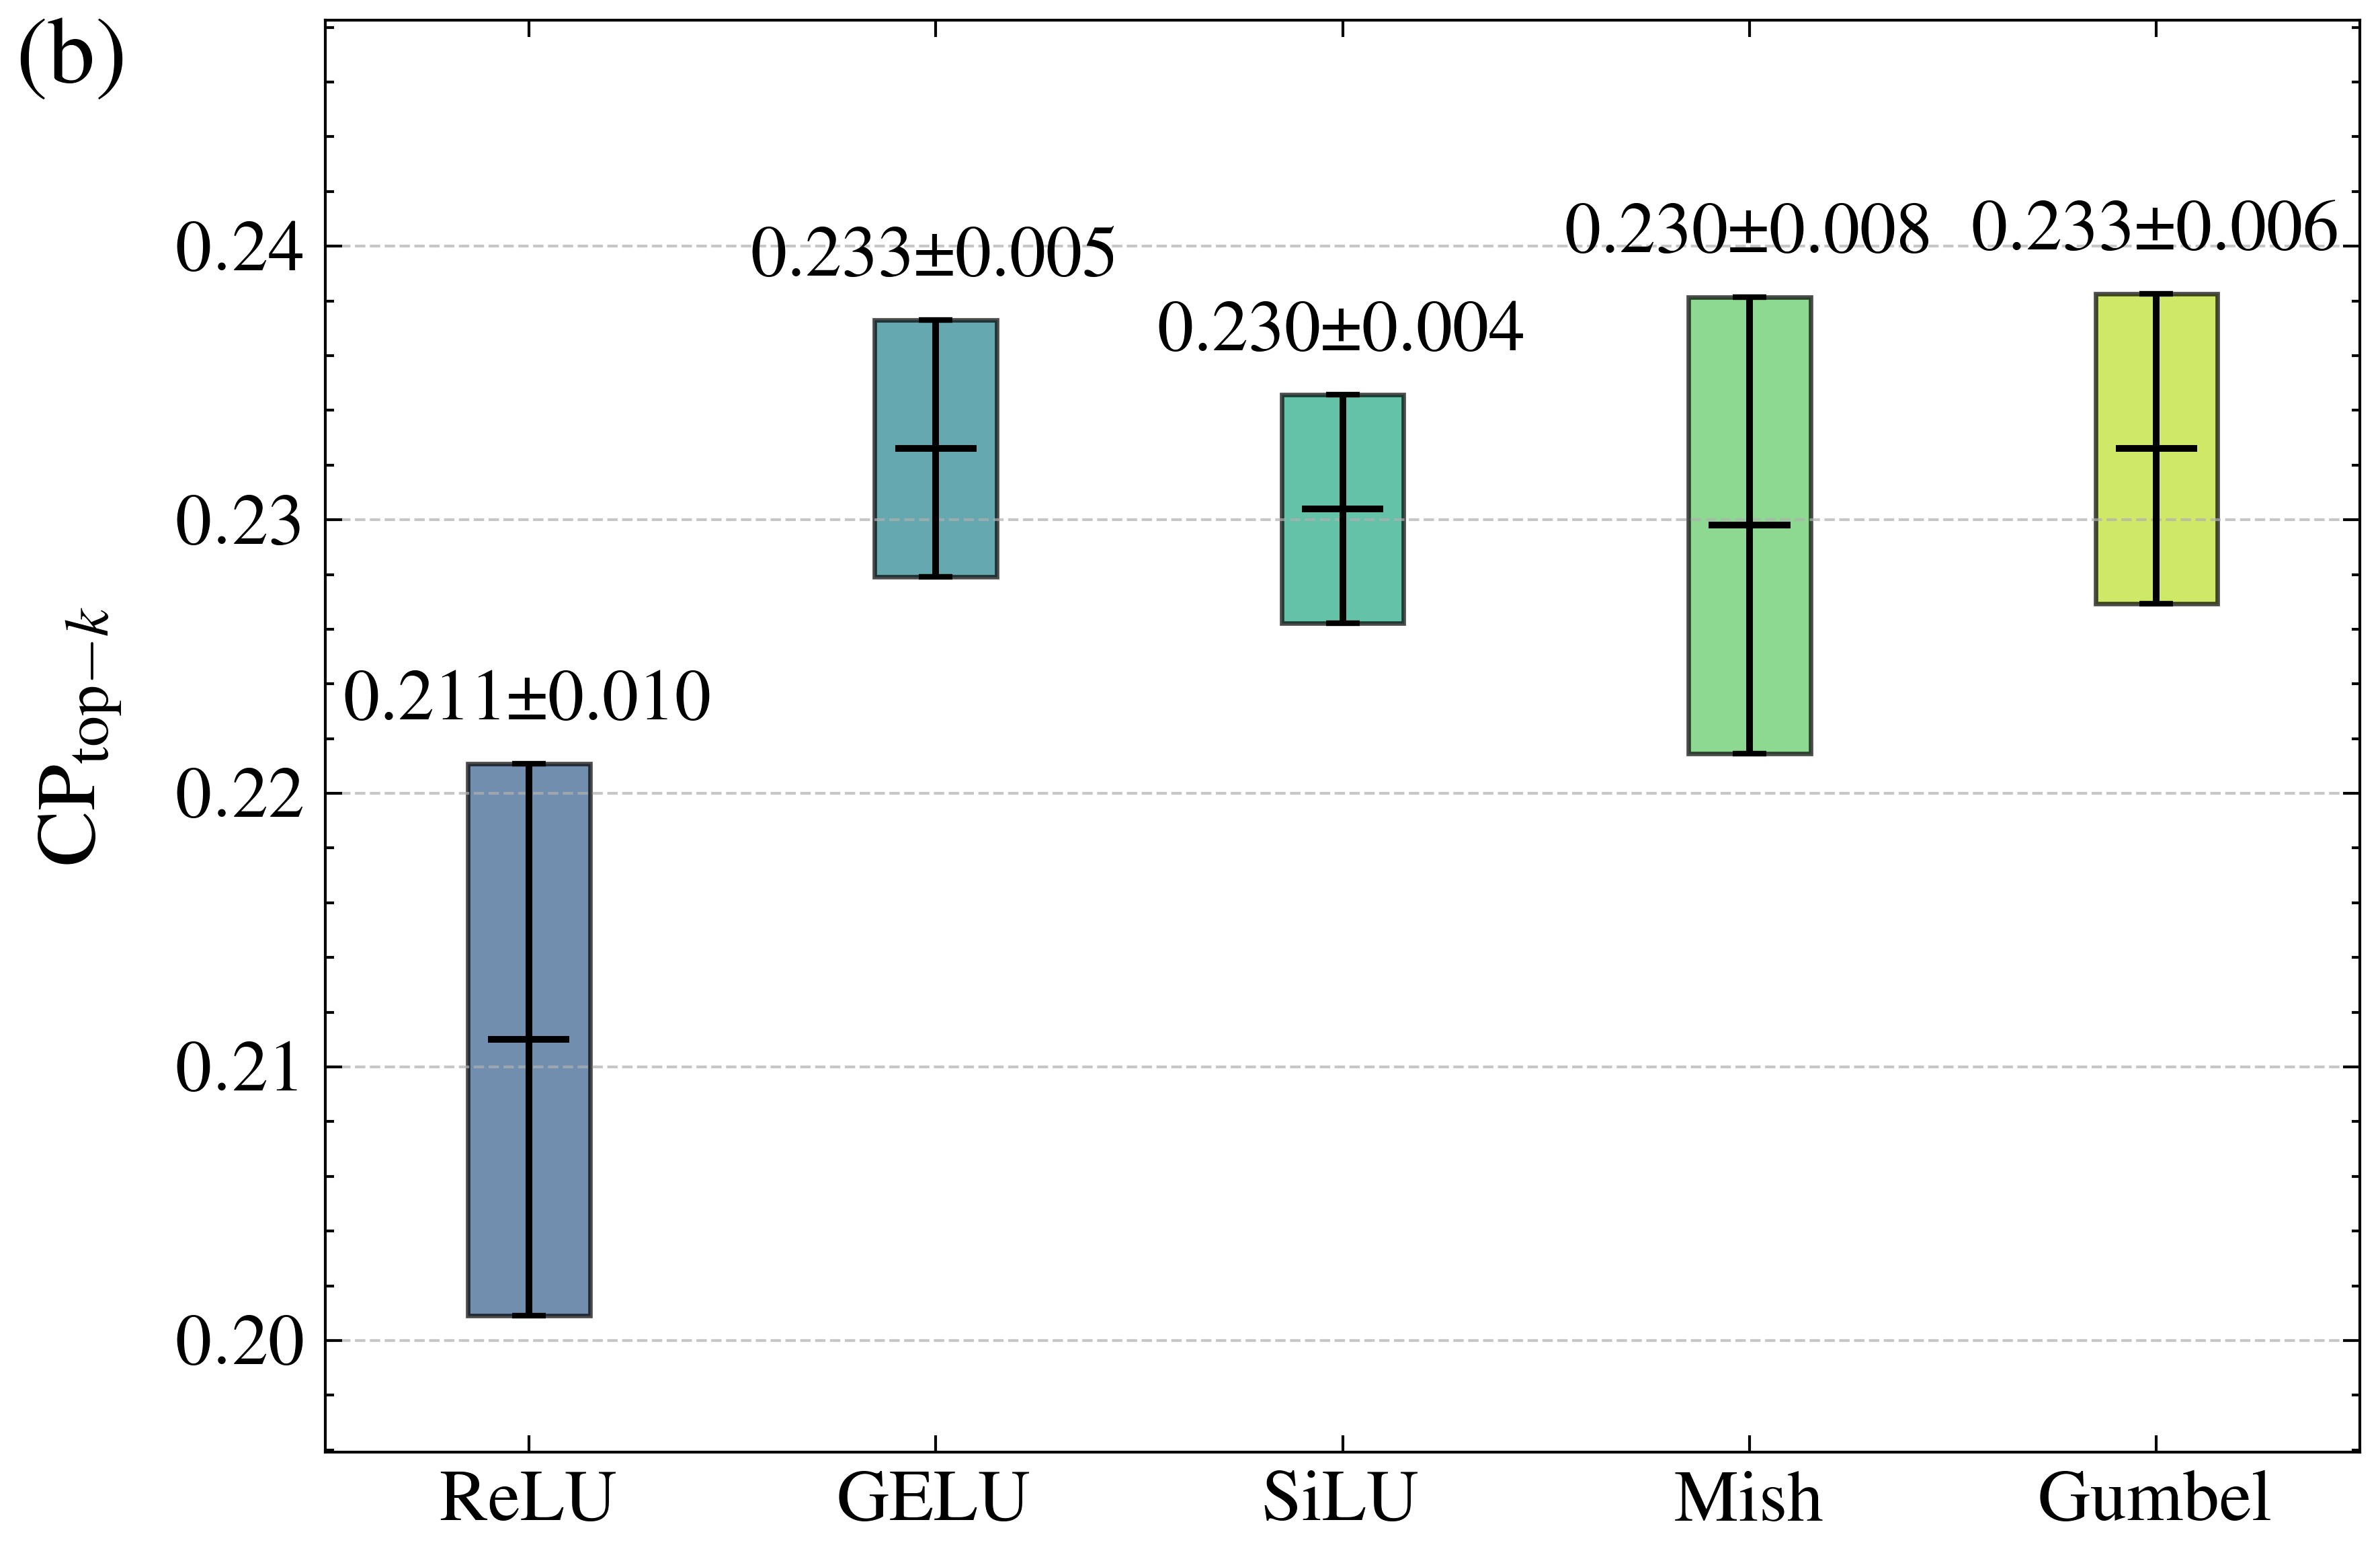

In [23]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 允许负号显示
plt.style.use(['science', 'ieee'])

# 激活函数及其 Top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
top_k_data = [
    [0.199, 0.213, 0.217, 0.219, 0.207],
    [0.236, 0.227, 0.236, 0.231, 0.233],
    [0.230, 0.236, 0.229, 0.227, 0.230],
    [0.233, 0.227, 0.229, 0.221, 0.239],
    [0.230, 0.230, 0.240, 0.234, 0.229]
]

# 计算均值、标准差、标准误（SE）、t 值、95% 置信区间
n_samples = len(top_k_data[0])
top_k_means = np.mean(top_k_data, axis=1)
top_k_stds = np.std(top_k_data, axis=1, ddof=1)  # 使用 ddof=1 计算样本标准差
top_k_se = top_k_stds / np.sqrt(n_samples)  # 计算标准误
t_value = t.ppf(0.975, df=n_samples - 1)  # 95% 置信区间的 t 值
top_k_ci = t_value * top_k_se  # 计算 95% 置信区间

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 控制柱子的宽度

# 创建颜色列表，使用 Viridis 颜色映射
colors = [plt.cm.viridis(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  # 让网格线在最底层

# 绘制误差范围矩形、均值线和误差条（置信区间）
for i in range(len(activation_functions)):
    # 计算上下限
    lower = top_k_means[i] - top_k_ci[i]
    upper = top_k_means[i] + top_k_ci[i]

    # 绘制置信区间范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(top_k_means[i], x[i] - width / 3, x[i] + width / 3, colors='black', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], top_k_means[i], yerr=top_k_ci[i], fmt='none',
                color='black', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    ax.annotate(f'{top_k_means[i]:.3f}±{top_k_ci[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),  # 上移一点
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13)

# 设置 y 轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围
y_min = min(top_k_means - top_k_ci) - 0.005
y_max = max(top_k_means + top_k_ci) + 0.01
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)

# 添加图标标记，例如 (c)
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('D:/Credit Card Fraud Detection/Fig3b.eps', format='eps', dpi=800)

# 显示图像
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


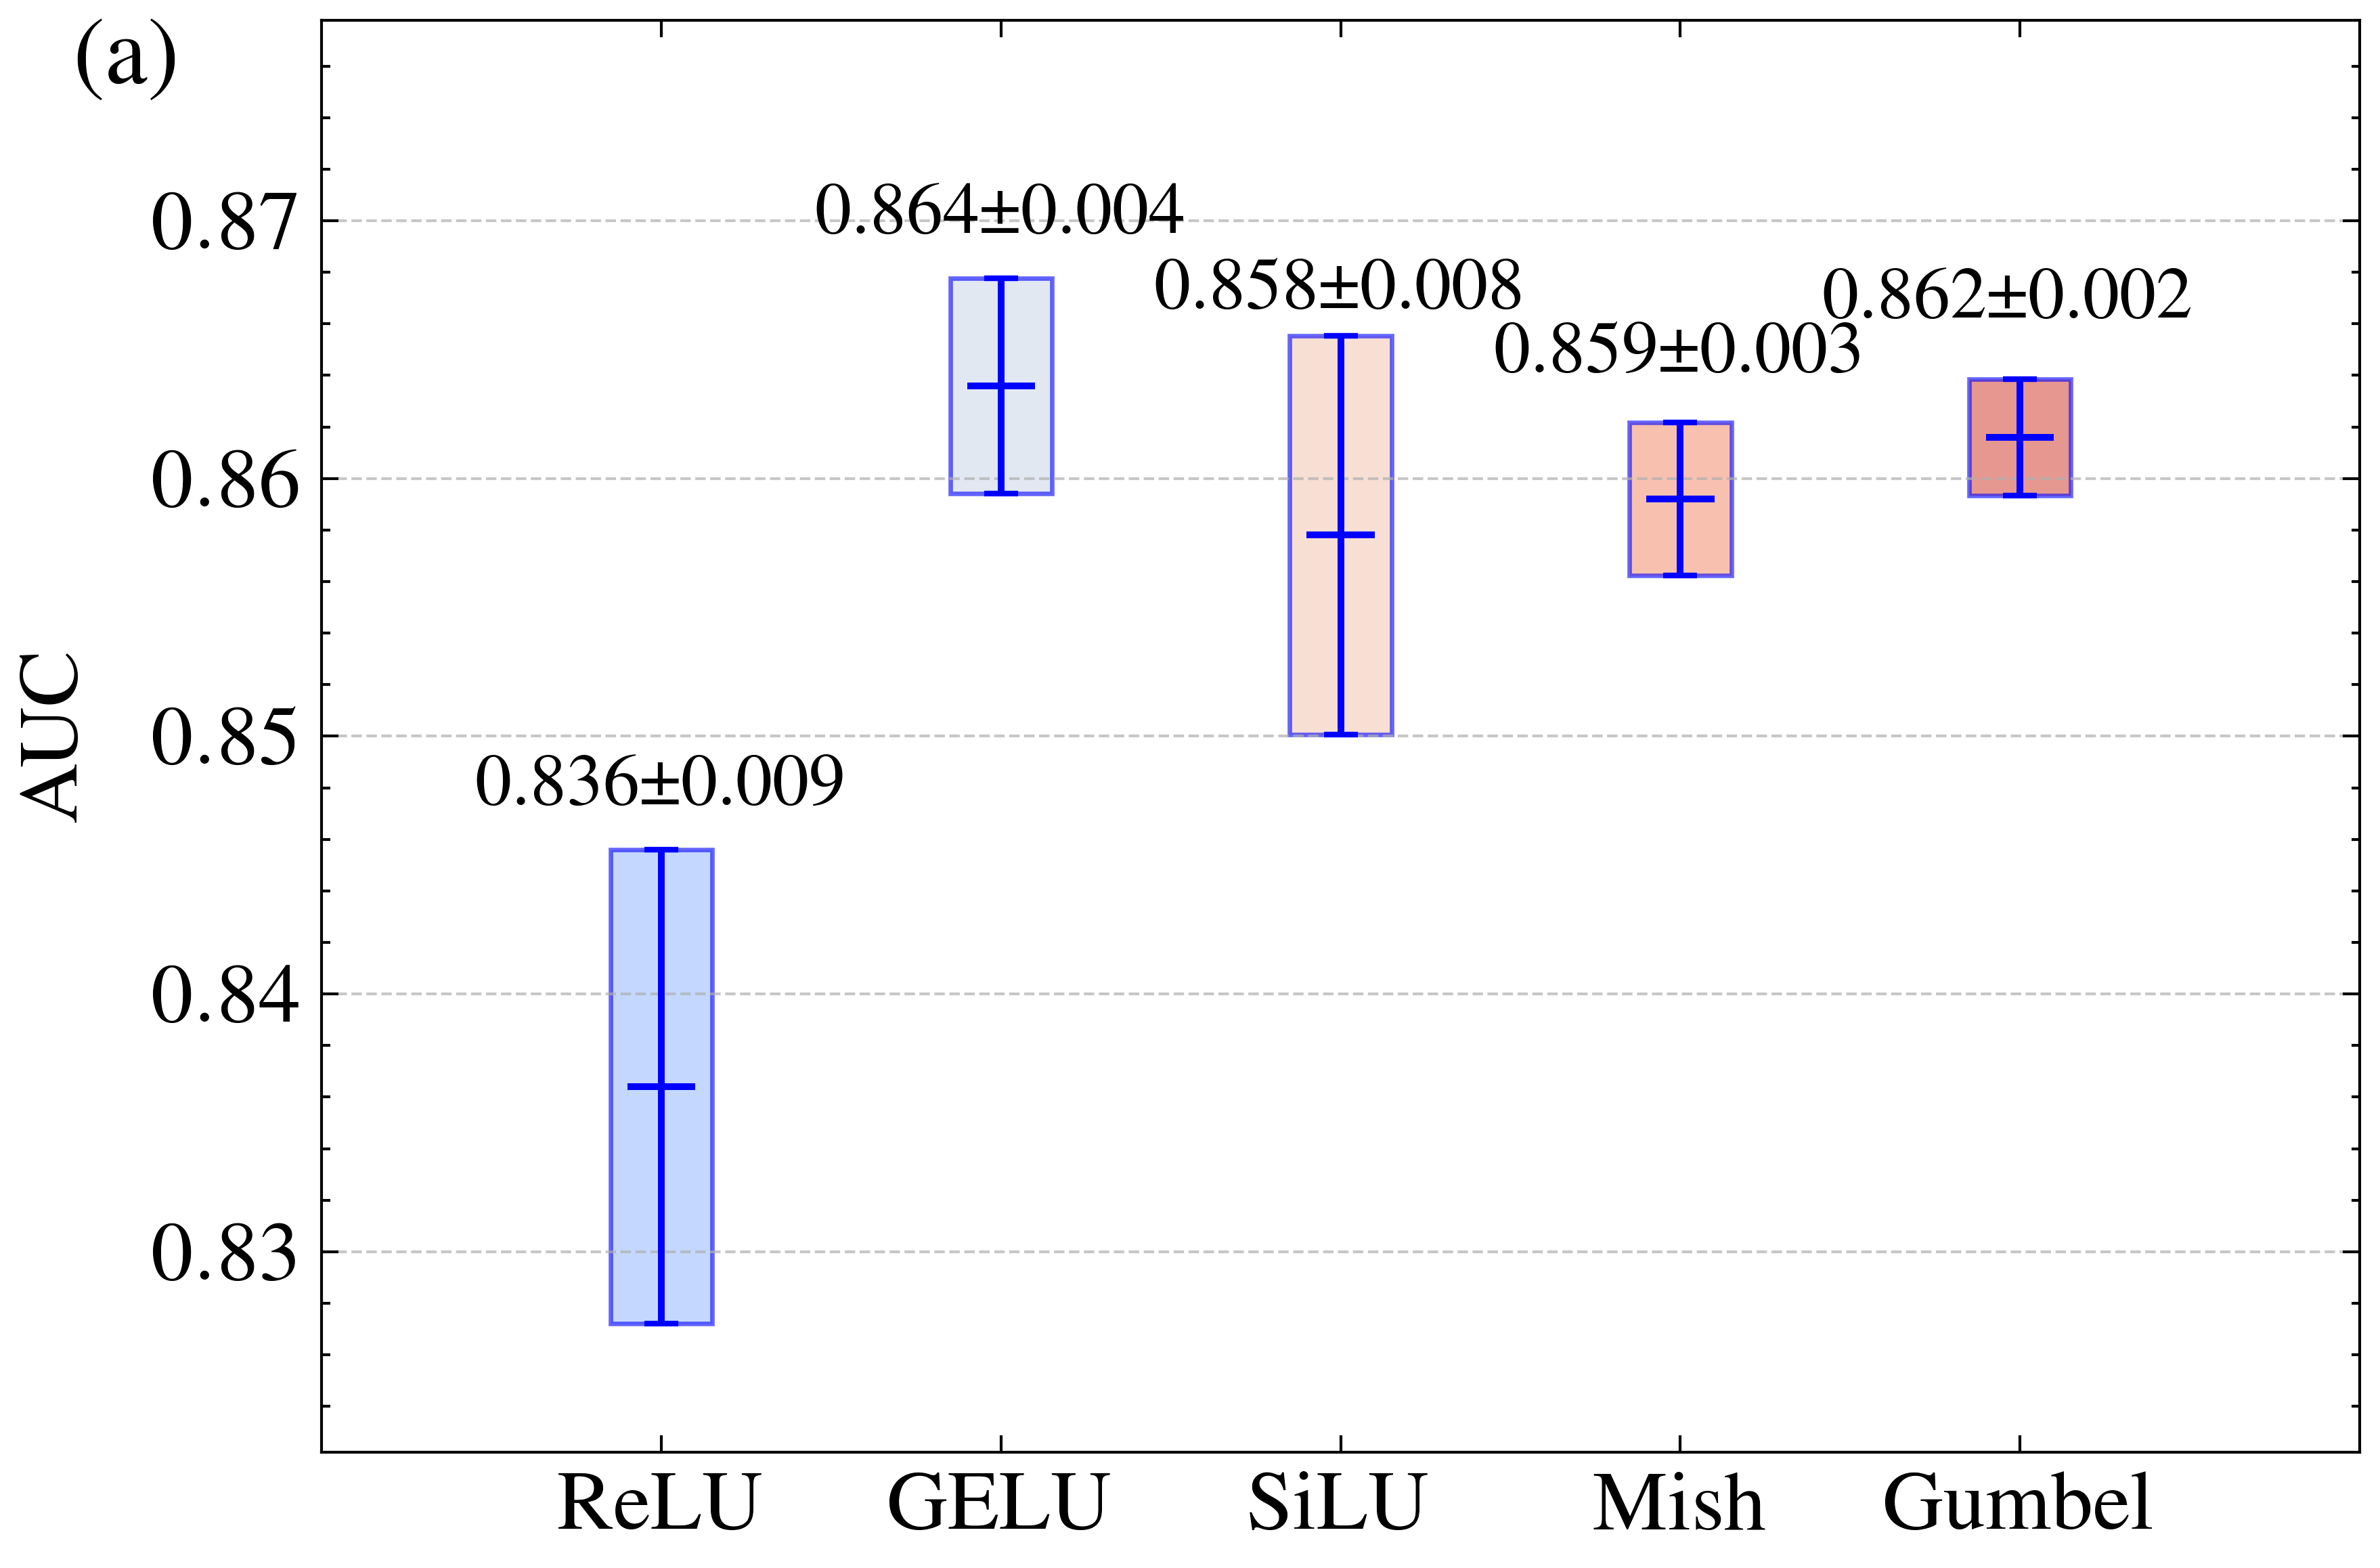

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数名称
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']

# 5 组数据（AUC 结果）
auc_data = np.array([
    [0.84, 0.826, 0.846, 0.836, 0.834],  # ReLU
    [0.86, 0.862, 0.864, 0.869, 0.863],  # GELU
    [0.859,0.862,0.847,0.862,0.859],  # SiLU
    [0.856,0.859,0.862,0.861,0.858],  # Mish
    [0.864,0.862,0.862,0.861,0.859]   # Gumbel
])

# 计算均值和标准差
auc_means = np.mean(auc_data, axis=1)
auc_stds = np.std(auc_data, axis=1, ddof=1)  # 样本标准差

# 样本数
n = auc_data.shape[1]

# 计算 95% 置信区间
t_value = t.ppf(0.975, n - 1)  # t 分布临界值
auc_cis = t_value * (auc_stds / np.sqrt(n))

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 矩形和误差条的宽度
width = 0.3  

# 创建灰度颜色列表（从浅到深）
# gray_levels = np.linspace(0.5, 0.9, len(activation_functions))  # 颜色更浅
# colors = [plt.cm.gray(level) for level in gray_levels]
#colors = [plt.cm.inferno(i) for i in np.linspace(0.2, 0.9, len(activation_functions))]
colors = [plt.cm.coolwarm(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  

# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算误差区间
    lower = auc_means[i] - auc_cis[i]
    upper = auc_means[i] + auc_cis[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, 
           color=colors[i], alpha=0.6, edgecolor='blue', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, 
              colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_cis[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5
    x_offset = 0
    if i == len(activation_functions) - 2: # Mish
        y_offset = 6
        x_offset = 0 # 调整 Mish 的水平偏移
    elif i == len(activation_functions) - 1: # Gumbel
        y_offset = 8 # 调整 Gumbel 的垂直偏移
        x_offset = -2 # 调整 Gumbel 的水平偏移
    if i == len(activation_functions) - 3: # Mish
        y_offset = 2
        x_offset = 0 # 调整 Mish 的水平偏移

    ax.annotate(f'{auc_means[i]:.3f}±{auc_cis[i]:.3f}',
        xy=(x[i], upper),
        xytext=(x_offset, y_offset),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=13)
# 设置轴标签
ax.set_ylabel(r'AUC', fontsize=15, labelpad=10)

# 设置 x 轴刻度
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min(auc_means - auc_cis) - 0.005
y_max = max(auc_means + auc_cis) + 0.01
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  

# 添加 (b) 标记
ax.text(-0.12, 1.0, '(a)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig4a.eps', format='eps', dpi=800)

# 显示图形
plt.show()

In [9]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


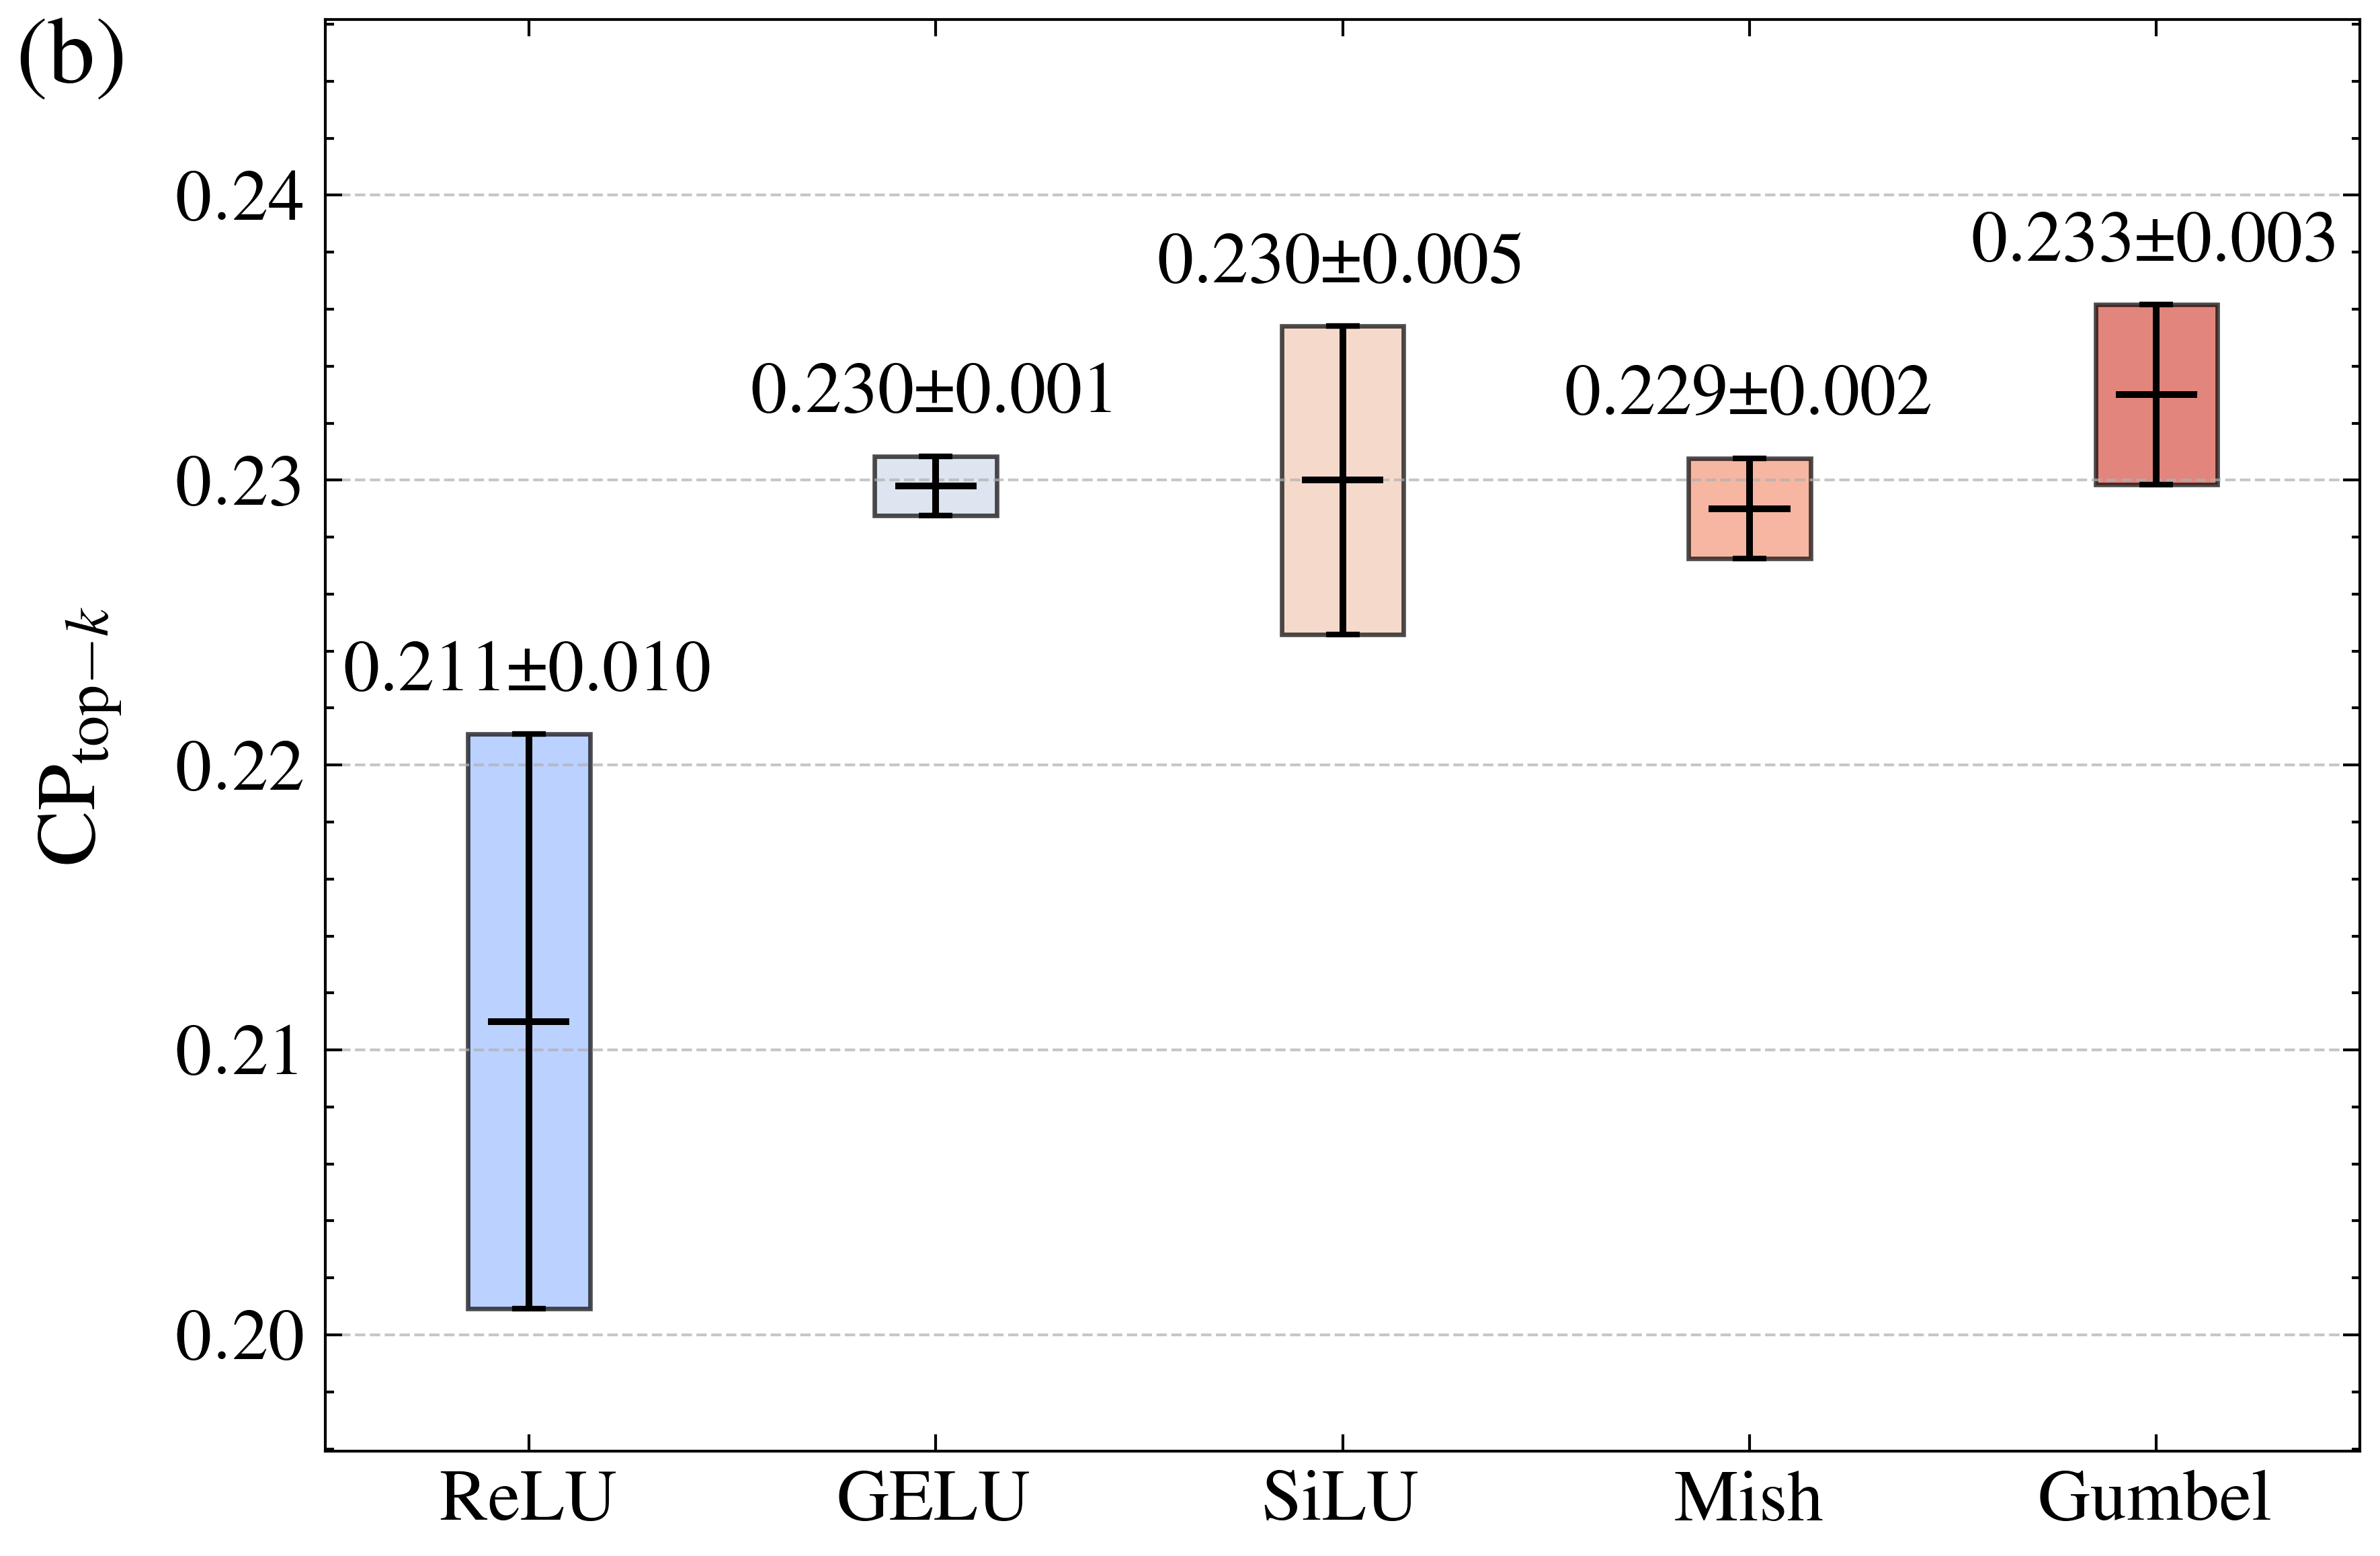

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 允许负号显示
plt.style.use(['science', 'ieee'])

# 激活函数及其 Top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
top_k_data = [
    [0.199, 0.213, 0.217, 0.219, 0.207],
    [0.23,0.23,0.229,0.231,0.229],
    [0.231,0.229,0.237,0.227,0.226],
    [0.229,0.229,0.229,0.227,0.231],
    [0.236,0.229,0.233,0.233,0.234]
]

# 计算均值、标准差、标准误（SE）、t 值、95% 置信区间
n_samples = len(top_k_data[0])
top_k_means = np.mean(top_k_data, axis=1)
top_k_stds = np.std(top_k_data, axis=1, ddof=1)  # 使用 ddof=1 计算样本标准差
top_k_se = top_k_stds / np.sqrt(n_samples)  # 计算标准误
t_value = t.ppf(0.975, df=n_samples - 1)  # 95% 置信区间的 t 值
top_k_ci = t_value * top_k_se  # 计算 95% 置信区间

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 控制柱子的宽度

# 创建颜色列表，使用 Viridis 颜色映射
colors = [plt.cm.coolwarm(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  # 让网格线在最底层

# 绘制误差范围矩形、均值线和误差条（置信区间）
for i in range(len(activation_functions)):
    # 计算上下限
    lower = top_k_means[i] - top_k_ci[i]
    upper = top_k_means[i] + top_k_ci[i]

    # 绘制置信区间范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(top_k_means[i], x[i] - width / 3, x[i] + width / 3, colors='black', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], top_k_means[i], yerr=top_k_ci[i], fmt='none',
                color='black', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    ax.annotate(f'{top_k_means[i]:.3f}±{top_k_ci[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),  # 上移一点
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13)

# 设置 y 轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围
y_min = min(top_k_means - top_k_ci) - 0.005
y_max = max(top_k_means + top_k_ci) + 0.01
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)

# 添加图标标记，例如 (c)
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('D:/Credit Card Fraud Detection/Fig4b.eps', format='eps', dpi=800)

# 显示图像
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


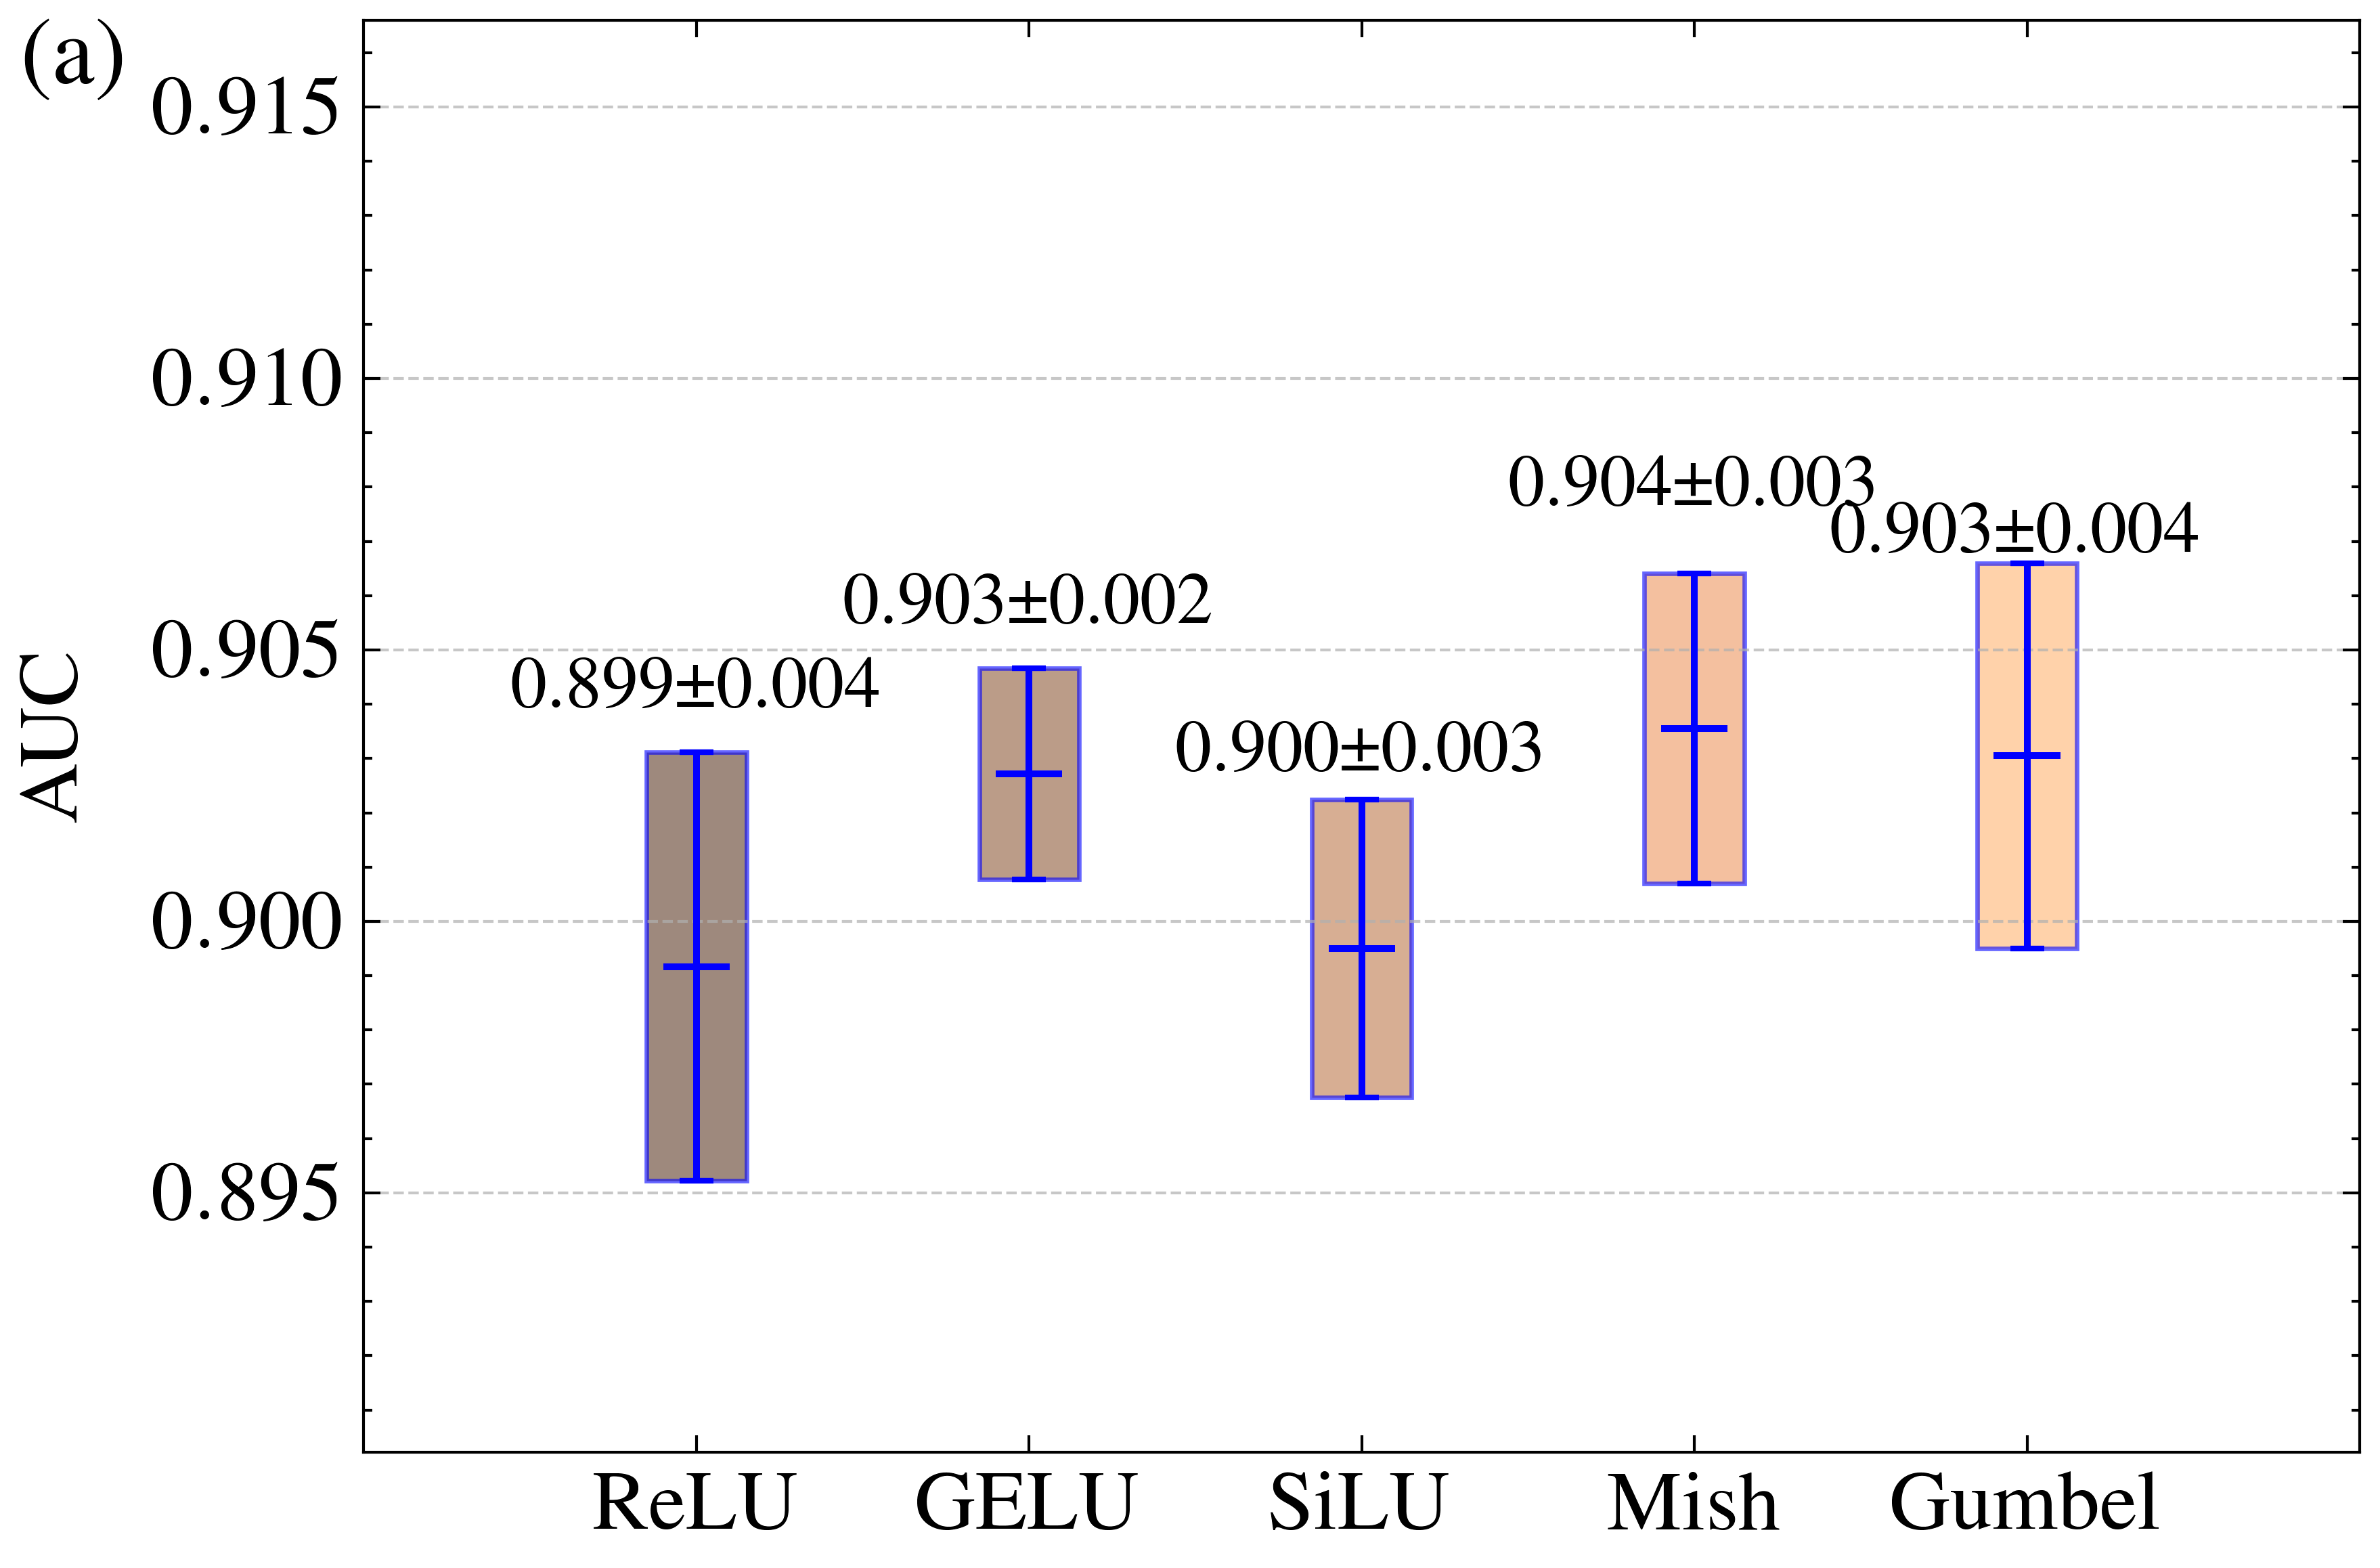

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数名称
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']

# 5 组数据（AUC 结果）
auc_data = np.array([
    [0.899,0.900,0.900,0.903,0.901,0.892],  # ReLU
    [0.9059,0.9019,0.9039,0.9019,0.9019,0.9008],  # GELU
    [0.9019,0.8968,0.8998,0.9019,0.9008,0.8958],  # SiLU
    [0.9049,0.9059,0.9008,0.9070,0.9019,0.9008],  # Mish
    [0.9029,0.8978,0.9059,0.9008,0.9070,0.9039]   # Gumbel
])

# 计算均值和标准差
auc_means = np.mean(auc_data, axis=1)
auc_stds = np.std(auc_data, axis=1, ddof=1)  # 样本标准差

# 样本数
n = auc_data.shape[1]

# 计算 95% 置信区间
t_value = t.ppf(0.975, n - 1)  # t 分布临界值
auc_cis = t_value * (auc_stds / np.sqrt(n))

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 矩形和误差条的宽度
width = 0.3  

# 创建灰度颜色列表（从浅到深）
# gray_levels = np.linspace(0.5, 0.9, len(activation_functions))  # 颜色更浅
# colors = [plt.cm.gray(level) for level in gray_levels]
#colors = [plt.cm.inferno(i) for i in np.linspace(0.2, 0.9, len(activation_functions))]
colors = [plt.cm.copper(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  

# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算误差区间
    lower = auc_means[i] - auc_cis[i]
    upper = auc_means[i] + auc_cis[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, 
           color=colors[i], alpha=0.6, edgecolor='blue', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, 
              colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_cis[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5
    x_offset = 0
    if i == len(activation_functions) - 2: # Mish
        y_offset = 9
        x_offset = 0 # 调整 Mish 的水平偏移
    elif i == len(activation_functions) - 1: # Gumbel
        y_offset = -1 # 调整 Gumbel 的垂直偏移
        x_offset = -2 # 调整 Gumbel 的水平偏移
    if i == len(activation_functions) - 3: # Mish
        y_offset = 2
        x_offset = 0 # 调整 Mish 的水平偏移

    ax.annotate(f'{auc_means[i]:.3f}±{auc_cis[i]:.3f}',
        xy=(x[i], upper),
        xytext=(x_offset, y_offset),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=13)
# 设置轴标签
ax.set_ylabel(r'AUC', fontsize=15, labelpad=10)

# 设置 x 轴刻度
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min(auc_means - auc_cis) - 0.005
y_max = max(auc_means + auc_cis) + 0.01
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  

# 添加 (b) 标记
ax.text(-0.17, 1.0, '(a)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig6a.eps', format='eps', dpi=800)

# 显示图形
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


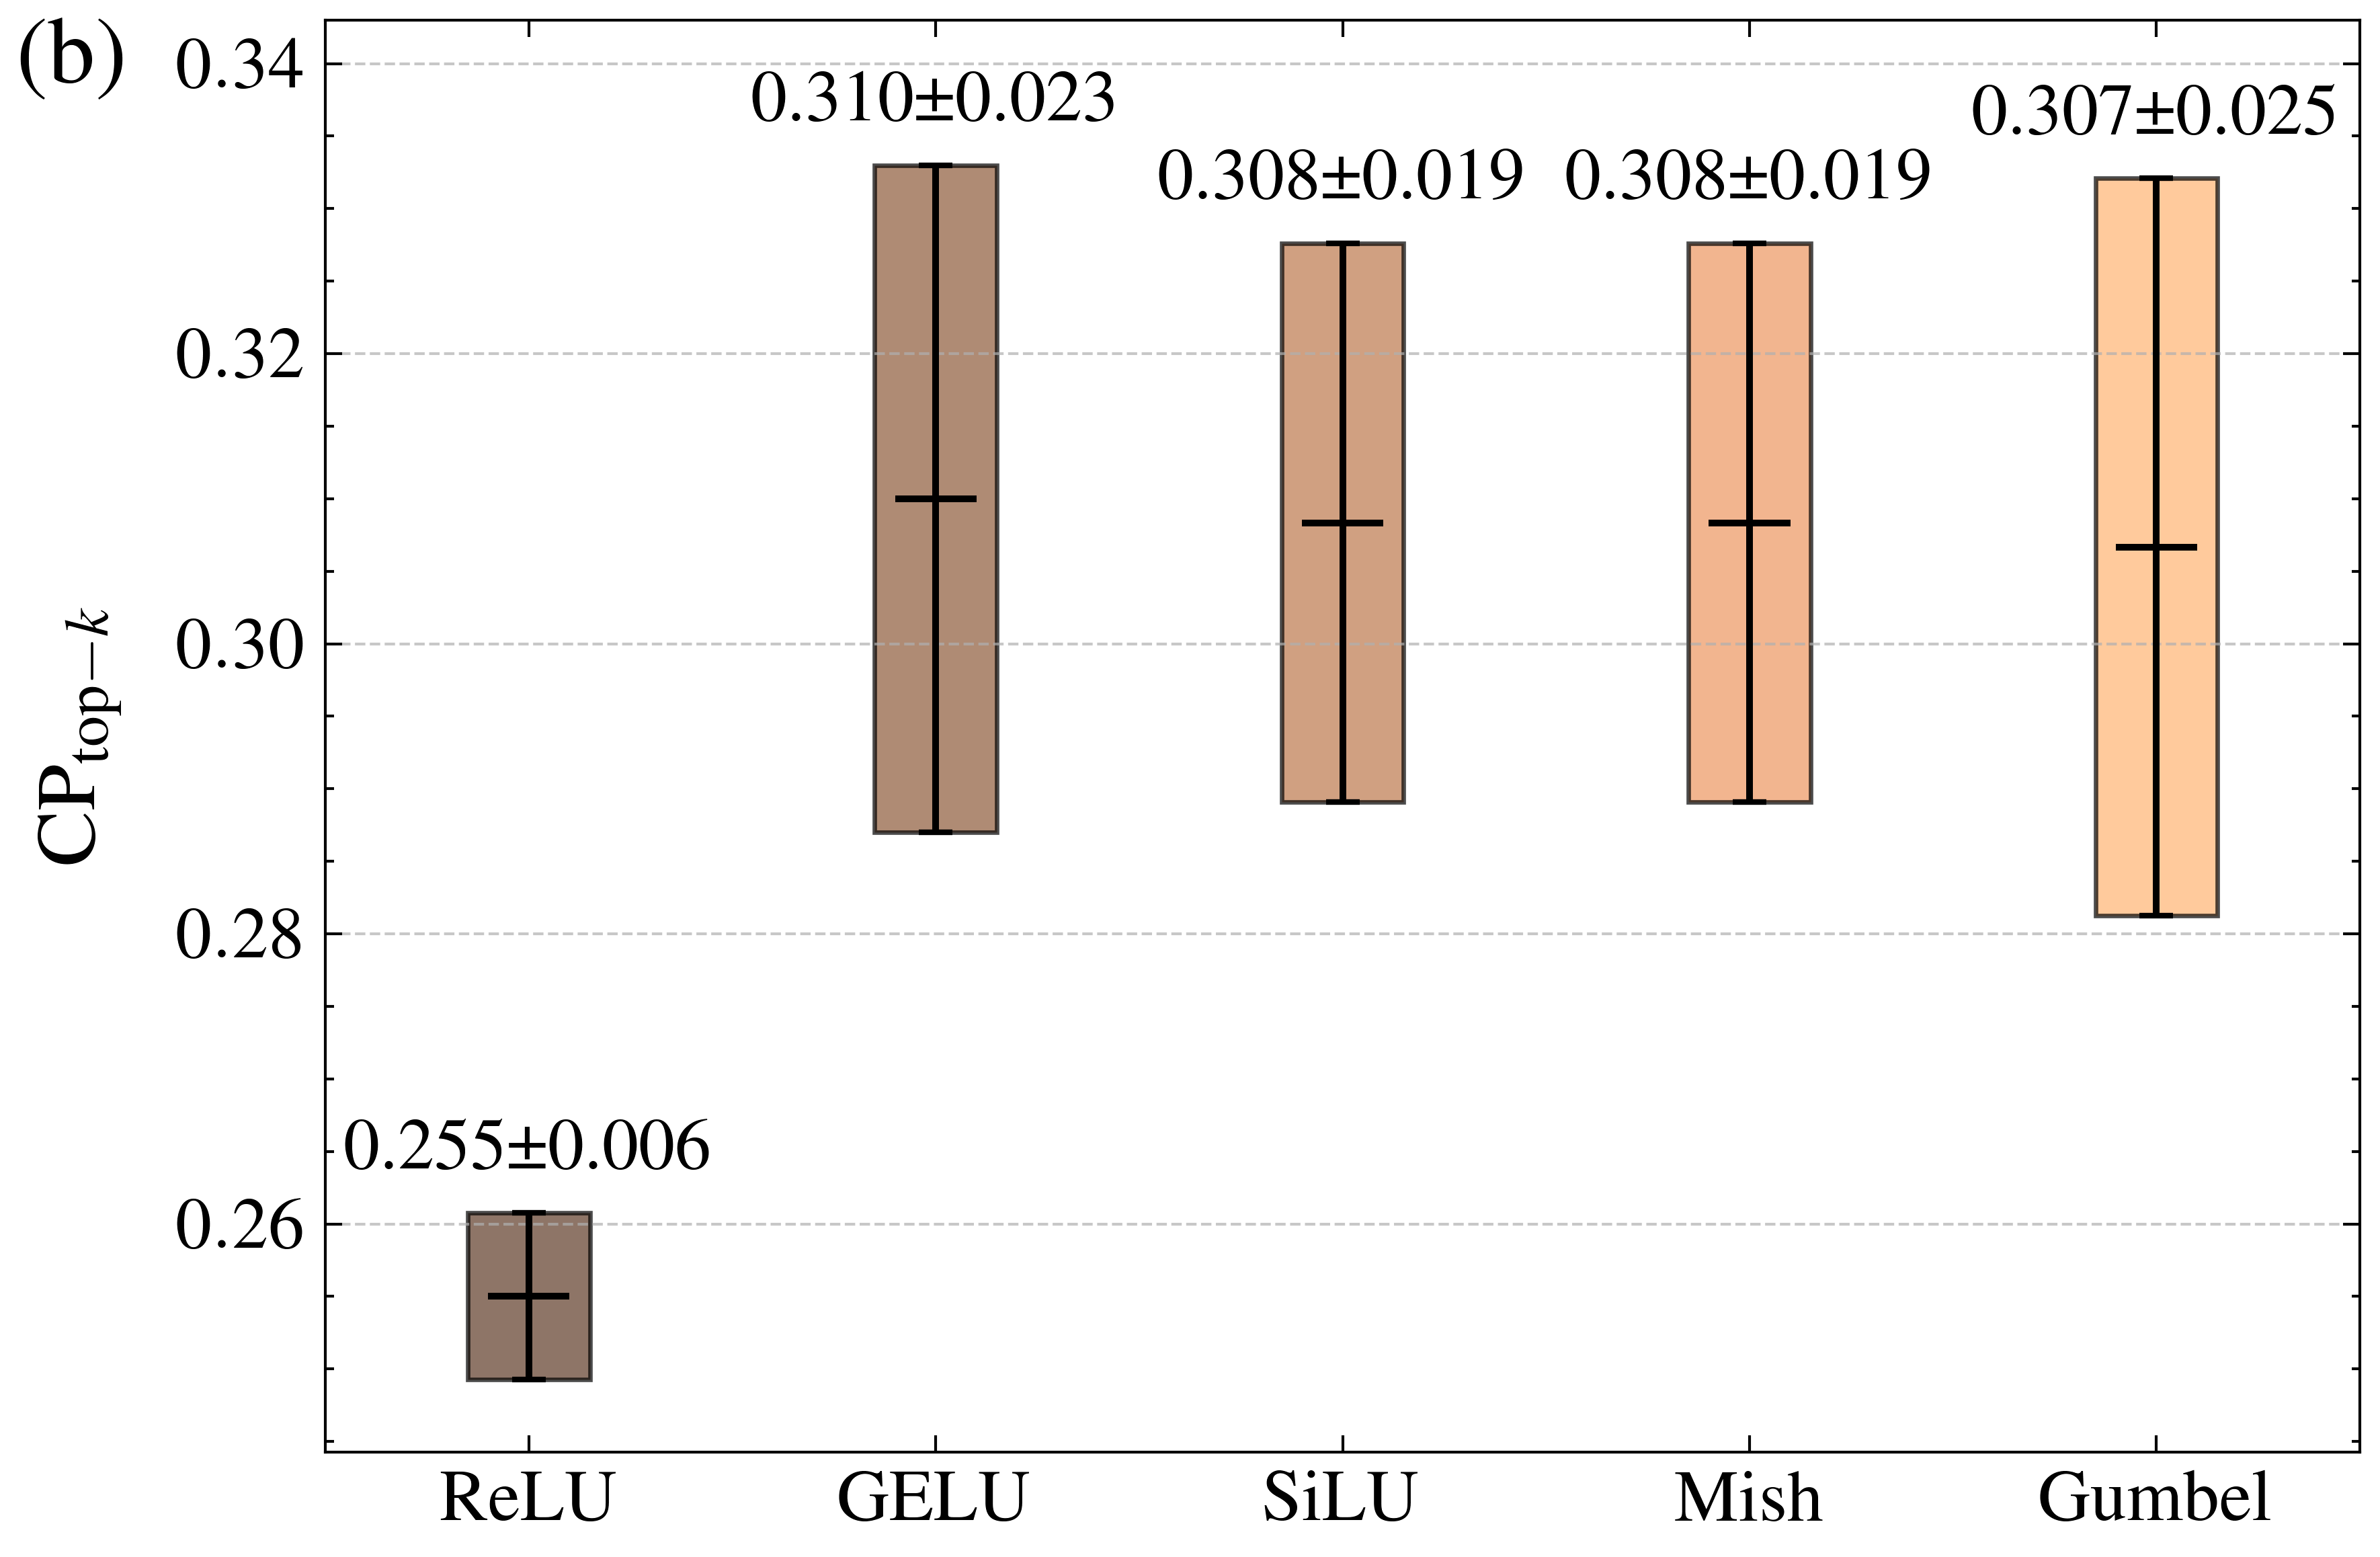

In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 允许负号显示
plt.style.use(['science', 'ieee'])

# 激活函数及其 Top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
top_k_data = [
    [0.25,0.26,0.25,0.26,0.25,0.26],
    [0.30,0.35,0.30,0.32,0.29,0.30],
    [0.30,0.32,0.30,0.32,0.28,0.33],
    [0.30,0.32,0.29,0.30,0.34,0.30],
    [0.34,0.32,0.32,0.28,0.28,0.30]
]

# 计算均值、标准差、标准误（SE）、t 值、95% 置信区间
n_samples = len(top_k_data[0])
top_k_means = np.mean(top_k_data, axis=1)
top_k_stds = np.std(top_k_data, axis=1, ddof=1)  # 使用 ddof=1 计算样本标准差
top_k_se = top_k_stds / np.sqrt(n_samples)  # 计算标准误
t_value = t.ppf(0.975, df=n_samples - 1)  # 95% 置信区间的 t 值
top_k_ci = t_value * top_k_se  # 计算 95% 置信区间

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 控制柱子的宽度

# 创建颜色列表，使用 Viridis 颜色映射
colors = [plt.cm.copper(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  # 让网格线在最底层

# 绘制误差范围矩形、均值线和误差条（置信区间）
for i in range(len(activation_functions)):
    # 计算上下限
    lower = top_k_means[i] - top_k_ci[i]
    upper = top_k_means[i] + top_k_ci[i]

    # 绘制置信区间范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(top_k_means[i], x[i] - width / 3, x[i] + width / 3, colors='black', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], top_k_means[i], yerr=top_k_ci[i], fmt='none',
                color='black', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    ax.annotate(f'{top_k_means[i]:.3f}±{top_k_ci[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),  # 上移一点
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13)

# 设置 y 轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围
y_min = min(top_k_means - top_k_ci) - 0.005
y_max = max(top_k_means + top_k_ci) + 0.01
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)

# 添加图标标记，例如 (c)
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('D:/Credit Card Fraud Detection/Fig6b.eps', format='eps', dpi=800)

# 显示图像
plt.show()